In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, f1_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 1. Problem statement

### 2. Data Gatharing

In [2]:
dataf = pd.read_csv("Loan_Data.csv")
dataf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
dataf.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
dataf.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
### Null Values in percentage
dataf.isna().sum() / len(dataf) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 3. EDA 

#####  Varifying Correlation between our variables

##### As we can see there is no strong Correlations between variables

<AxesSubplot:>

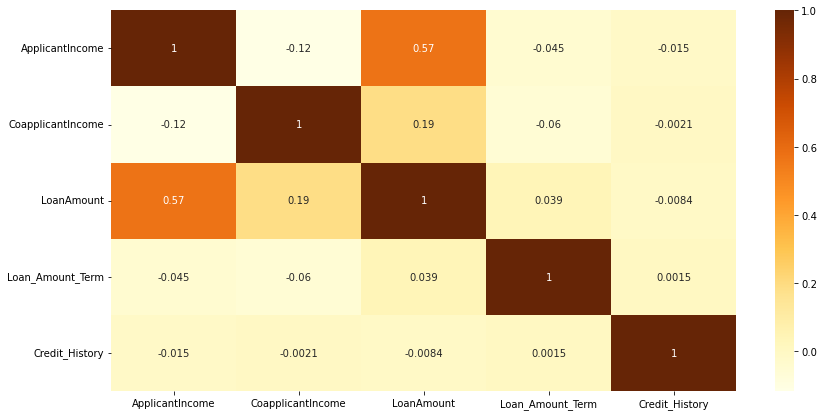

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(dataf.corr(), annot=True, cmap="YlOrBr")

In [9]:
dataf.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [10]:
dataf.shape

(614, 13)

In [11]:
dataf["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
dataf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
col = []
val = []
for i in ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]:
#     print(i, dataf[i].unique())
    col.append(i)
    val.append(dataf[i].unique())

# print(col)
# print(val)

pd.Series(val,col)

Gender                 [Male, Female, nan]
Married                     [No, Yes, nan]
Dependents              [0, 1, 2, 3+, nan]
Education         [Graduate, Not Graduate]
Self_Employed               [No, Yes, nan]
Property_Area    [Urban, Rural, Semiurban]
Loan_Status                         [Y, N]
dtype: object

In [14]:
for i in ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]:
    print(dataf[i].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


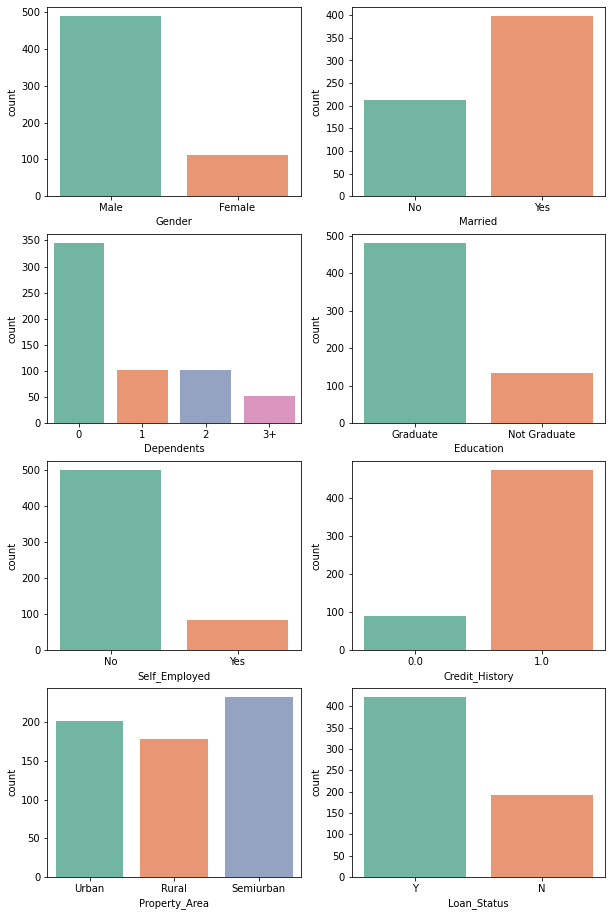

In [15]:
plt.figure(figsize=(10,16), facecolor="White")

plt.subplot(4,2,1)
sns.countplot(x = "Gender", palette = 'Set2', data = dataf)

plt.subplot(4,2,2)
sns.countplot(x = "Married", palette = 'Set2', data = dataf)

plt.subplot(4,2,3)
sns.countplot(x = "Dependents", palette = 'Set2', data = dataf)

plt.subplot(4,2,4)
sns.countplot(x = "Education", palette = 'Set2', data = dataf)

plt.subplot(4,2,5)
sns.countplot(x = "Self_Employed", palette = 'Set2', data = dataf)

plt.subplot(4,2,6)
sns.countplot(x = "Credit_History", palette = 'Set2', data = dataf)

plt.subplot(4,2,7)
sns.countplot(x = "Property_Area", palette = 'Set2', data = dataf)

plt.subplot(4,2,8)
sns.countplot(x = "Loan_Status", palette = 'Set2', data = dataf)
plt.savefig("Count_plot.png")


In [16]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


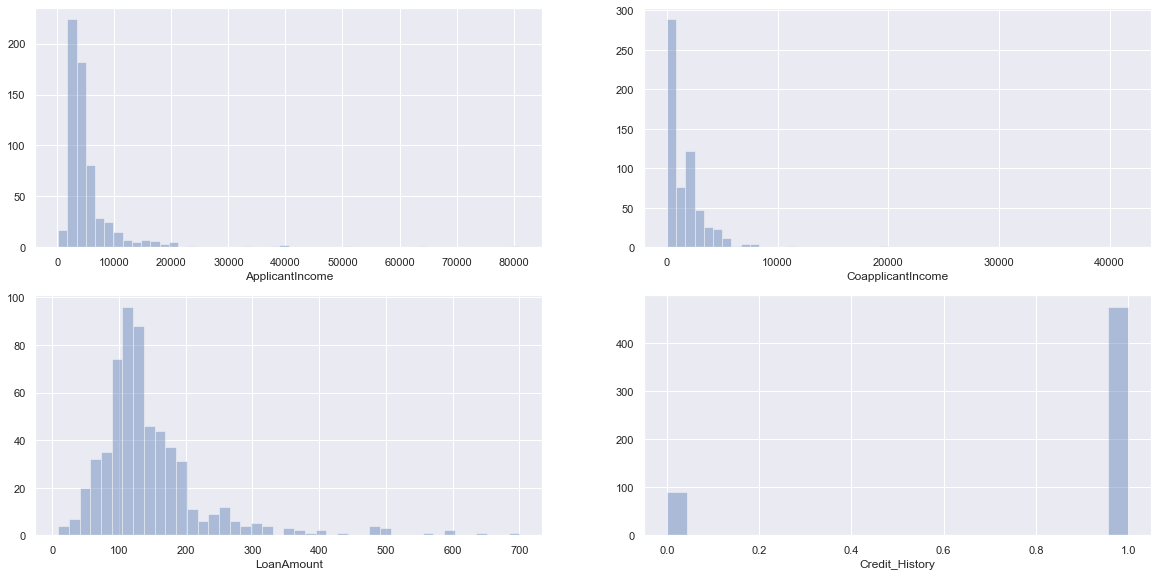

In [17]:
plt.figure(figsize=(20,15))
sns.set(color_codes=True)
plt.subplot(3,2,1)
sns.distplot(dataf["ApplicantIncome"], kde=False)

plt.subplot(3,2,2)
sns.distplot(dataf["CoapplicantIncome"], kde=False)

plt.subplot(3,2,3)
sns.distplot(dataf["LoanAmount"], kde=False)

plt.subplot(3,2,4)
sns.distplot(dataf["Credit_History"], kde=False)

plt.savefig("contineous_data_compair.png")


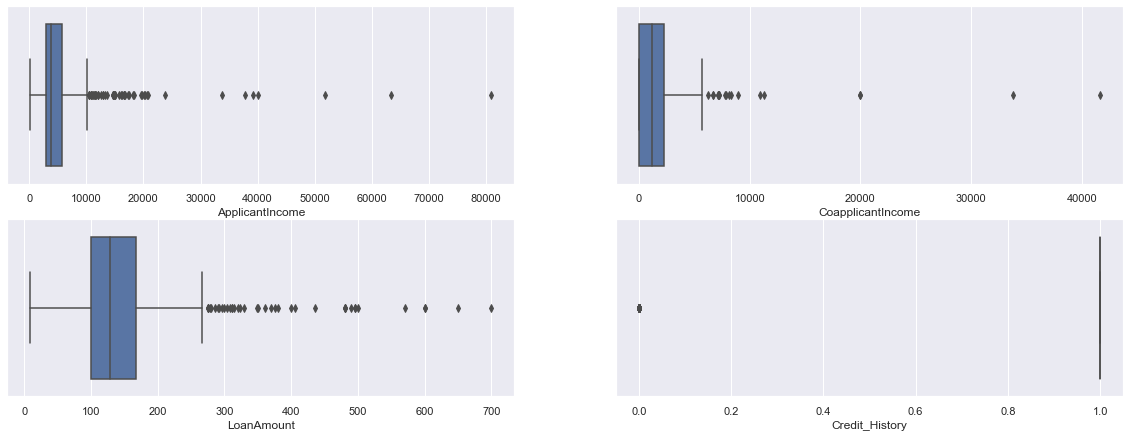

In [18]:
plt.figure(figsize=(20,15), facecolor="white")


plt.subplot(4,2,1)
sns.boxplot(dataf["ApplicantIncome"])


plt.subplot(4,2,2)
sns.boxplot(dataf["CoapplicantIncome"])


plt.subplot(4,2,3)
sns.boxplot(dataf["LoanAmount"])


plt.subplot(4,2,4)
sns.boxplot(dataf["Credit_History"])

plt.savefig("outliers.png")

In [19]:
dataf.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
#removed all the nan values from the Creadit History
df = dataf[dataf['Credit_History'].notnull()]

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [22]:
df.isna().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             552 non-null    object 
 2   Married            561 non-null    object 
 3   Dependents         549 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      538 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         543 non-null    float64
 9   Loan_Amount_Term   550 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [24]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [25]:
### Replace Object values by mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [26]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

In [28]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder

lablenc = LabelEncoder()

In [31]:
df["Gender"] = lablenc.fit_transform(df["Gender"])
df["Married"] = lablenc.fit_transform(df["Married"])
df["Dependents"] = lablenc.fit_transform(df["Dependents"])
df["Self_Employed"] = lablenc.fit_transform(df["Self_Employed"])
df["Property_Area"] = lablenc.fit_transform(df["Property_Area"])
df["Loan_Status"] = lablenc.fit_transform(df["Loan_Status"])
df["Education"] = lablenc.fit_transform(df["Education"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    int32  
 2   Married            564 non-null    int32  
 3   Dependents         564 non-null    int32  
 4   Education          564 non-null    int32  
 5   Self_Employed      564 non-null    int32  
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    int32  
 12  Loan_Status        564 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 46.3+ KB


In [33]:
df.drop("Loan_ID", axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int32  
 1   Married            564 non-null    int32  
 2   Dependents         564 non-null    int32  
 3   Education          564 non-null    int32  
 4   Self_Employed      564 non-null    int32  
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    int32  
 11  Loan_Status        564 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 41.9 KB


### Model Training

In [35]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [36]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [37]:
Log_model = LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred_te = Log_model.predict(x_test)
y_pred_tr = Log_model.predict(X_train)

In [39]:
y_pred_te[:5]

array([1, 1, 1, 1, 1])

In [40]:
y_test[:5]

191    0
482    1
299    0
596    0
528    1
Name: Loan_Status, dtype: int32

In [41]:
y_pred_tr[:5]

array([1, 1, 1, 1, 0])

In [42]:
y_train[:5]

154    1
405    1
443    1
467    1
48     0
Name: Loan_Status, dtype: int32

## Model Evaluation

In [43]:
confusion_matrix(y_test,y_pred_te)

array([[14, 22],
       [ 2, 75]], dtype=int64)

In [44]:
confusion_matrix(y_train,y_pred_tr)

array([[ 69,  74],
       [  6, 302]], dtype=int64)

In [45]:
f1_train = f1_score(y_train, y_pred_tr)
print(f"Training Accuracy:- {f1_train}")
print("*"*40)
f1_test = f1_score(y_test, y_pred_te)
print(f"Testing Accuracy:- {f1_test}")


Training Accuracy:- 0.8830409356725147
****************************************
Testing Accuracy:- 0.8620689655172413


In [46]:
cls_rep = classification_report(y_train, y_pred_tr)
print(cls_rep)
print("*"*70)
cls_rep1 = classification_report(y_test, y_pred_te)
print(cls_rep1)

              precision    recall  f1-score   support

           0       0.92      0.48      0.63       143
           1       0.80      0.98      0.88       308

    accuracy                           0.82       451
   macro avg       0.86      0.73      0.76       451
weighted avg       0.84      0.82      0.80       451

**********************************************************************
              precision    recall  f1-score   support

           0       0.88      0.39      0.54        36
           1       0.77      0.97      0.86        77

    accuracy                           0.79       113
   macro avg       0.82      0.68      0.70       113
weighted avg       0.81      0.79      0.76       113



### Auc-Roc Curve

In [47]:
y_prob = Log_model.predict_proba(X_train)
y_prob_te = Log_model.predict_proba(x_test)

In [48]:
Roc_Auc_Score = roc_auc_score(y_train, y_prob[:,1])
print(f"Roc_Auc_Score :- {Roc_Auc_Score}")
print("*"*50)
Roc_Auc_Score = roc_auc_score(y_test, y_prob_te[:,1])
print(f"Roc_Auc_Score for Test :- {Roc_Auc_Score}")

Roc_Auc_Score :- 0.7916401780038145
**************************************************
Roc_Auc_Score for Test :- 0.6641414141414141


In [49]:
fpr, tpr, threshold = roc_curve(y_train, y_prob[:,1])

In [50]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_prob_te[:,1])

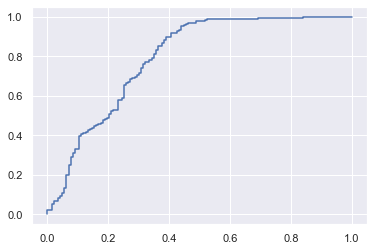

In [51]:
plt.plot(fpr, tpr)

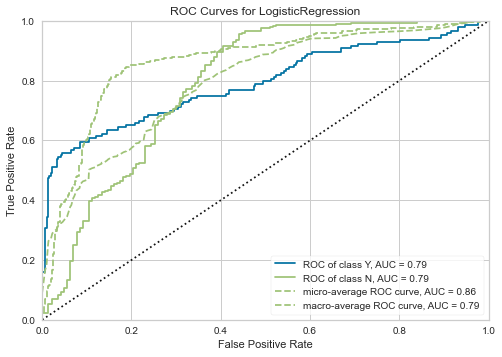

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
from yellowbrick import ROCAUC

vis = ROCAUC(Log_model, classes=["Y","N"])
vis.fit(X_train, y_train)
vis.score(X_train, y_train)
vis.show()    

In [53]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
Gen, Mar, Dep, Edu, S_emp, ApIn, Coap, LA, LAT, CH, PA = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']    

In [55]:
def Predict(Gen, Mar, Dep, Edu, S_emp, ApIn, Coap, LA, LAT, CH, PA):
    pred = Log_model.predict([[Gen, Mar, Dep, Edu, S_emp, ApIn, Coap, LA, LAT, CH, PA]])
    return(pred[0])

Predict(1,0,0,0,0,5849,0.0,145.08,360,1,2)

1

In [56]:
import pickle
import os

Model_folder_path = "model"
if not os.path.exists(Model_folder_path):
    os.mkdir(Model_folder_path)
    
pickle.dump(Log_model, open(f"{Model_folder_path}/model.pkl", "wb"))